# ***Netflix recommendation project***

* Dataset Links :

1. Movie titles  
https://drive.google.com/file/d/1bSQx-Tzi4ZTWP5QbBJjkn5Ri19Ozk0So/view?usp=drive_link
2. All data  
https://drive.google.com/file/d/1jOJrcyadYK0uV2453dfxyJdYC1Brsfky/view?usp=drive_link

1. Introduction :
The goal of this project is to build a personalized movie recommendation system using Netflix user rating data. Recommendation systems are crucial in modern digital platforms to enhance user experience by suggesting relevant content based on user preferences and behavior.



2. Dataset Overview
   * Source: Netflix Prize dataset

   * Files Used:

      combined_data_1.txt.zip: Contains user ratings for movies.
       
      movie_titles.csv: Contains metadata about movies (ID, year, title).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(('/content/drive/MyDrive/NETFLIX/Copy of Copy of combined_data_1.txt.zip'),header  =None,names =['Cust_Id',"Rating"],usecols =[0,1])

In [4]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [5]:
movie_count = df.isnull().sum()
movie_count = movie_count ['Rating']
movie_count

4499

In [6]:
total_count = df['Cust_Id'].nunique()

In [7]:
customer_count = total_count - movie_count

In [8]:
customer_count

470758

4. Exploratory Data Analysis

   * Visualized the distribution of ratings using a bar plot.

   * Analyzed the number of ratings per movie and per user to understand data sparsity.

In [9]:
rating_count = df['Cust_Id'].count()- movie_count
rating_count

24053764

In [10]:
stars = df.groupby("Rating")['Rating'].agg(['count'])

In [11]:
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


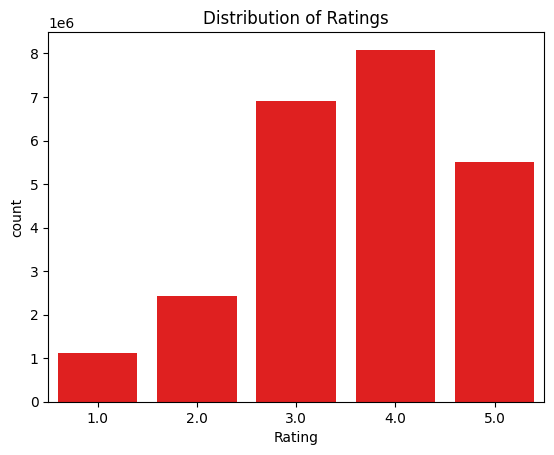

In [12]:
sns.barplot(x=stars.index,y=stars['count'],color='red')
plt.title('Distribution of Ratings')
plt.show()

In [13]:
movie_id = None
movie_np =[]

for i in df['Cust_Id']:
  if ':' in i:
    movie_id = int(i.replace(":",''))
  movie_np.append(movie_id)

In [14]:
df['Movie_Id']= movie_np

In [15]:
df

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


3. Data Preprocessing

Loaded the dataset using pandas.

* Extracted and cleaned the data:

    Removed rows with missing ratings.

    Parsed movie IDs from the dataset.

* Filtered out:

    Movies with fewer ratings than the 60th percentile.

    Users with fewer ratings than the 60th percentile.

In [16]:
df = df[df['Rating'].notna()]

In [17]:
df

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [18]:
movie_ratings=df['Movie_Id'].value_counts()

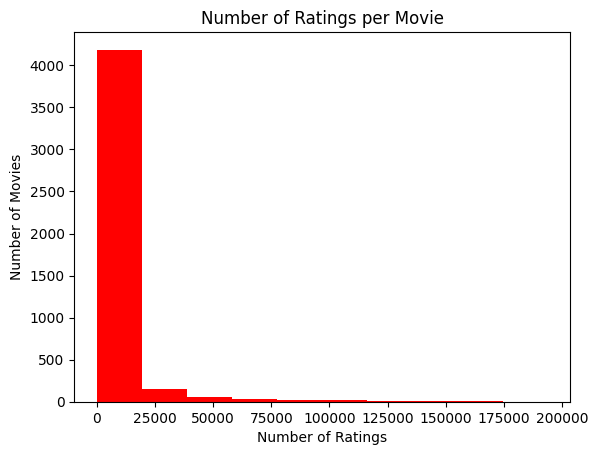

In [56]:
plt.hist(movie_ratings,color='red')

plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')

plt.show()


In [20]:
ratings_per_user = df['Cust_Id'].value_counts()

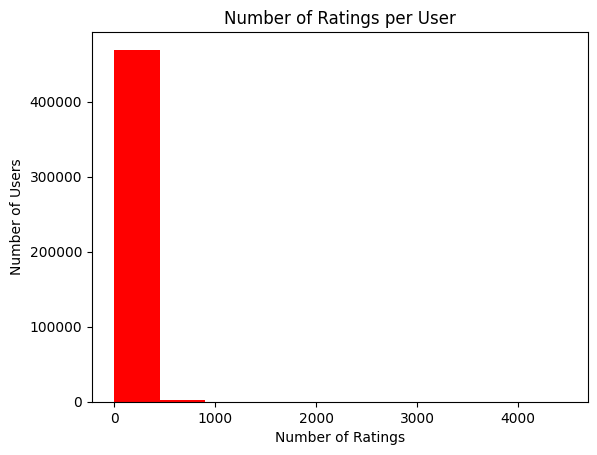

In [54]:
plt.hist(ratings_per_user,color='red')

plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Users')

plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 734.1+ MB


In [23]:
df['Cust_Id'].astype(int)

,Cust_Id
1,1488844
2,822109
3,885013
4,30878
5,823519
...,...
24058258,2591364
24058259,1791000
24058260,512536
24058261,988963


In [24]:
df['Movie_Id'].value_counts()

,count
Movie_Id,
1905,193941
2152,162597
3860,160454
4432,156183
571,154832
...,...
4294,44
915,43
3656,42


In [25]:
dataset_movie_summary = df.groupby("Movie_Id")['Rating'].agg(['count'])

In [26]:
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [27]:
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)

In [28]:
movie_benchmark

908.0

In [29]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

In [30]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count'] < movie_benchmark].index

In [31]:
dataset_cust_summary = df.groupby("Cust_Id")['Rating'].agg(['count'])

In [32]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)

In [33]:
cust_benchmark

36.0

In [34]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

In [35]:
netflix_dataset = df[~df['Movie_Id'].isin(drop_movie_list)]
netflix_dataset = df[~df['Cust_Id'].isin(drop_cust_list)]

In [36]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [37]:
df_title = pd.read_csv("/content/drive/MyDrive/NETFLIX/Copy of Copy of movie_titles.csv",encoding = 'ISO-8859-1',header = None,names =['Movie_Id','Year','Name'],usecols =[0,1,2])

In [38]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


5. Building the Recommendation Model
* Library Used: Surprise (a Python scikit for building and analyzing recommender systems).
* Algorithm: Singular Value Decomposition (SVD)
Steps:
* Used the Reader and Dataset classes to load the data.
* Trained the SVD model on a subset of 100,000 ratings.
* Evaluated the model using 3-fold cross-validation with RMSE as the metric.

In [39]:
!pip install sckit-surprise

ERROR: Could not find a version that satisfies the requirement sckit-surprise (from versions: none)
ERROR: No matching distribution found for sckit-surprise


In [40]:
#

In [41]:
from surprise import Reader, Dataset,SVD
from surprise.model_selection import cross_validate

In [42]:
reader = Reader()

In [43]:
data = Dataset.load_from_df(netflix_dataset[['Cust_Id','Movie_Id','Rating']][:100000],reader)

In [44]:
model = SVD()

In [45]:
cross_validate(model,data,measures =['RMSE'],cv =3)

{'test_rmse': array([1.02177313, 1.02310353, 1.02357323]),
 'fit_time': (1.6027371883392334, 2.925149917602539, 3.898759603500366),
 'test_time': (0.25760316848754883, 1.1119763851165771, 1.0682547092437744)}

In [46]:
user_rating = netflix_dataset[netflix_dataset['Cust_Id'] ==1331154]

In [47]:
user_1331154 = df_title.copy()

In [48]:
user_1331154 = user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]

In [49]:
user_1331154["Estimated_score"] =user_1331154['Movie_Id'].apply(lambda x: model.predict(1331154,x).est)

In [50]:
user_1331154

,Movie_Id,Year,Name,Estimated_score
2,3,1997.0,Character,3.687817
4,5,2004.0,The Rise and Fall of ECW,3.859131
5,6,1997.0,Sick,3.146494
7,8,2004.0,What the #$*! Do We Know!?,3.138686
15,16,1996.0,Screamers,3.120043
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.562632
17766,17767,2004.0,Fidel Castro: American Experience,3.562632
17767,17768,2000.0,Epoch,3.562632
17768,17769,2003.0,The Company,3.562632


In [51]:
user_1331154.sort_values('Estimated_score',ascending = False).head()

,Movie_Id,Year,Name,Estimated_score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.969667
27,28,2002.0,Lilo and Stitch,3.867693
4,5,2004.0,The Rise and Fall of ECW,3.859131
17,18,1994.0,Immortal Beloved,3.827730
29,30,2003.0,Something's Gotta Give,3.744113


In [52]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [59]:
user_30878

,Movie_Id,Year,Name,Estimated_score
2,3,1997.0,Character,3.687817
4,5,2004.0,The Rise and Fall of ECW,3.859131
5,6,1997.0,Sick,3.146494
7,8,2004.0,What the #$*! Do We Know!?,3.138686
15,16,1996.0,Screamers,3.120043
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.562632
17766,17767,2004.0,Fidel Castro: American Experience,3.562632
17767,17768,2000.0,Epoch,3.562632
17768,17769,2003.0,The Company,3.562632


In [58]:
user_rating = netflix_dataset[netflix_dataset['Cust_Id'] ==30878]
user_30878 = df_title.copy()
user_30878 = user_30878[~user_30878['Movie_Id'].isin(drop_movie_list)]
user_30878["Estimated_score"] =user_30878['Movie_Id'].apply(lambda x: model.predict(30878,x).est)
user_30878.sort_values('Estimated_score',ascending = False).head()

,Movie_Id,Year,Name,Estimated_score
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.969667
27,28,2002.0,Lilo and Stitch,3.867693
4,5,2004.0,The Rise and Fall of ECW,3.859131
17,18,1994.0,Immortal Beloved,3.827730
29,30,2003.0,Something's Gotta Give,3.744113


7. Conclusion

This project demonstrates how collaborative filtering techniques like SVD can be used to build effective recommendation systems. With further tuning and larger datasets, the model can be scaled to provide real-time recommendations for millions of users.

Author:

Akshay Bhimashankar Biradar

Student, MIT-ADT Pune, Maharashtra

